# Arima Time Series Model

#### Library Imports

In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
from matplotlib import pyplot as plt
from matplotlib.pyplot import figure
from statsmodels.tsa.stattools import adfuller
from statsmodels.tsa.seasonal import seasonal_decompose
from statsmodels.tsa.arima_model import ARIMA
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf 
import statsmodels.api as sm
from sklearn.metrics import mean_squared_error, mean_absolute_error
import math
from pmdarima.arima import auto_arima
from pandas.plotting import register_matplotlib_converters
register_matplotlib_converters()
import warnings
warnings.filterwarnings("ignore")

In [2]:
#pip show statsmodels

#### Bring dataframes from ForecastingStockVolatility.ipynb

In [3]:
apple_df =  pd.read_pickle('data/apple_prep4.pkl')

In [4]:
apple_df

,date,open,high,low,close,adj_close,volume,year,month,day,week_of_year,day_of_week,day_of_week_number,close_open_variation,intraday_variation,daily_change,moving_average_10,moving_average_15,moving_average_50
0,1980-12-12,0.128348,0.128906,0.128348,0.128348,0.100751,469033600,1980,12,12,50,Friday,5,0.000000,0.434756,0.000000,0.128348,0.128348,0.128348
1,1980-12-15,0.122210,0.122210,0.121652,0.121652,0.095495,175884800,1980,12,15,51,Monday,1,-0.456591,0.458685,-0.052171,0.125000,0.125000,0.125000
2,1980-12-16,0.113281,0.113281,0.112723,0.112723,0.088485,105728000,1980,12,16,51,Tuesday,2,-0.492580,0.495019,-0.073398,0.120908,0.120908,0.120908
3,1980-12-17,0.115513,0.116071,0.115513,0.115513,0.090676,86441600,1980,12,17,51,Wednesday,3,0.000000,0.483063,0.024751,0.119559,0.119559,0.119559
4,1980-12-18,0.118862,0.119420,0.118862,0.118862,0.093304,73449600,1980,12,18,51,Thursday,4,0.000000,0.469452,0.028992,0.119420,0.119420,0.119420
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
10184,2021-05-05,129.199997,130.449997,127.970001,128.100006,127.882790,84000900,2021,5,5,18,Wednesday,3,-0.851386,1.937951,0.001955,132.238001,132.832667,126.544000
10185,2021-05-06,127.889999,129.750000,127.129997,129.740005,129.520004,78128300,2021,5,6,18,Thursday,4,1.446560,2.060885,0.012802,132.018001,132.515334,126.631800
10186,2021-05-07,130.850006,131.259995,129.479996,130.210007,130.210007,78892700,2021,5,7,18,Friday,5,-0.489109,1.374729,0.003623,131.607001,132.252001,126.816200
10187,2021-05-10,129.410004,129.539993,126.809998,126.849998,126.849998,88071200,2021,5,10,19,Monday,1,-1.978213,2.152823,-0.025805,130.820001,131.719335,126.928000


In [5]:
apple_df.index=apple_df['date']

In [6]:
apple_df = apple_df.loc['2005-01-01':'2020-01-01']

In [7]:
apple_df

,date,open,high,low,close,adj_close,volume,year,month,day,week_of_year,day_of_week,day_of_week_number,close_open_variation,intraday_variation,daily_change,moving_average_10,moving_average_15,moving_average_50
date,,,,,,,,,,,,,,,,,,,
2005-01-03,2005-01-03,1.156786,1.162679,1.117857,1.130179,0.971844,691992000,2005,1,3,1,Monday,1,-2.300080,4.009636,-0.017236,1.140071,1.149393,1.066729
2005-01-04,2005-01-04,1.139107,1.169107,1.124464,1.141786,0.981825,1096810400,2005,1,4,1,Tuesday,2,0.235184,3.970158,0.010270,1.142250,1.148238,1.072632
2005-01-05,2005-01-05,1.151071,1.165179,1.143750,1.151786,0.990424,680433600,2005,1,5,1,Wednesday,3,0.062116,1.873574,0.008758,1.143696,1.147298,1.078686
2005-01-06,2005-01-06,1.154821,1.159107,1.130893,1.152679,0.991192,705555200,2005,1,6,1,Thursday,4,-0.185483,2.494843,0.000775,1.145125,1.146452,1.084607
2005-01-07,2005-01-07,1.160714,1.243393,1.156250,1.236607,1.063362,2227450400,2005,1,7,1,Friday,5,6.538475,7.536692,0.072811,1.154482,1.149607,1.091375
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2019-12-24,2019-12-24,71.172501,71.222504,70.730003,71.067497,70.234581,48478800,2019,12,24,52,Tuesday,2,-0.147535,0.696311,0.000951,69.627998,68.642499,65.160600
2019-12-26,2019-12-26,71.205002,72.495003,71.175003,72.477501,71.628067,93121200,2019,12,26,52,Thursday,4,1.787092,1.854584,0.019840,70.106499,69.111999,65.433550
2019-12-27,2019-12-27,72.779999,73.492500,72.029999,72.449997,71.600876,146266000,2019,12,27,52,Friday,5,-0.453424,2.030405,-0.000379,70.564999,69.515666,65.710700


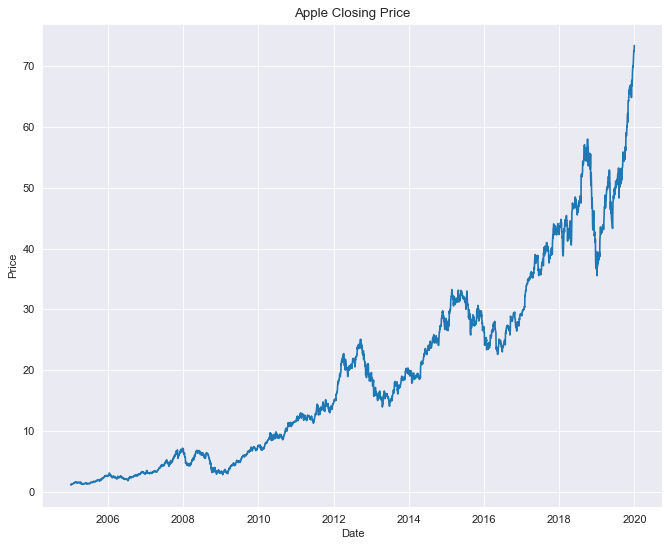

In [8]:
figure(figsize=(10, 8), dpi=80)

sns.set_style("darkgrid")
sns.lineplot(x=apple_df.index,y=apple_df.close,data=apple_df)
sns.set_palette(['#62C370', '#FFD166', '#EF476F'])# Plot
plt.title('Apple Closing Price')
plt.xlabel('Date')
plt.ylabel('Price');

#### Indexed Apple dataframe

In [9]:
apple_df.head()

,date,open,high,low,close,adj_close,volume,year,month,day,week_of_year,day_of_week,day_of_week_number,close_open_variation,intraday_variation,daily_change,moving_average_10,moving_average_15,moving_average_50
date,,,,,,,,,,,,,,,,,,,
2005-01-03,2005-01-03,1.156786,1.162679,1.117857,1.130179,0.971844,691992000,2005,1,3,1,Monday,1,-2.300080,4.009636,-0.017236,1.140071,1.149393,1.066729
2005-01-04,2005-01-04,1.139107,1.169107,1.124464,1.141786,0.981825,1096810400,2005,1,4,1,Tuesday,2,0.235184,3.970158,0.010270,1.142250,1.148238,1.072632
2005-01-05,2005-01-05,1.151071,1.165179,1.143750,1.151786,0.990424,680433600,2005,1,5,1,Wednesday,3,0.062116,1.873574,0.008758,1.143696,1.147298,1.078686
2005-01-06,2005-01-06,1.154821,1.159107,1.130893,1.152679,0.991192,705555200,2005,1,6,1,Thursday,4,-0.185483,2.494843,0.000775,1.145125,1.146452,1.084607
2005-01-07,2005-01-07,1.160714,1.243393,1.156250,1.236607,1.063362,2227450400,2005,1,7,1,Friday,5,6.538475,7.536692,0.072811,1.154482,1.149607,1.091375


#### Plot the Rolling Mean and Standard Deviation of the Opening price variable to determine if time series is Stationary

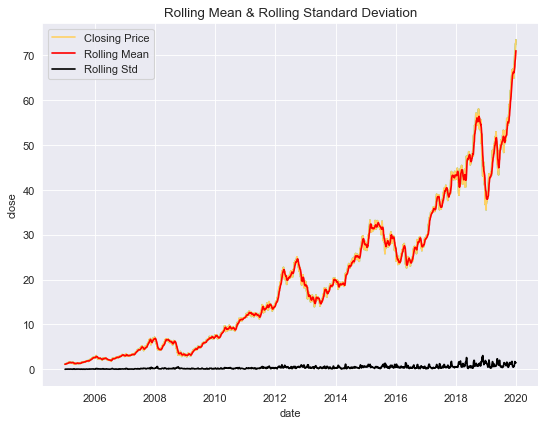

In [10]:
rolling_mean = apple_df['close'].rolling(window = 12,min_periods = 1).mean()
rolling_std = apple_df['close'].rolling(window = 12,min_periods = 1).std()

figure(figsize=(8, 6), dpi=80)

# Change default palette
sns.lineplot(x=apple_df.index,y=apple_df.close,data=apple_df)
sns.set_palette(['#62C370', '#FFD166', '#EF476F'])# Plot


plt.title('Rolling Mean & Rolling Standard Deviation of Apple Opening Stock Price')
plt.plot(apple_df.close, label = "Closing Price")

plt.plot(rolling_mean, color = 'red', label = 'Rolling Mean')
plt.plot(rolling_std, color = 'black', label = 'Rolling Std')
plt.legend(loc = 'best')
plt.title('Rolling Mean & Rolling Standard Deviation')
plt.show()

#### From 'statsmodels' use the Augmented Dickey Fuller Test to determine stationarity 

In [11]:
result = adfuller(apple_df.close)
print('ADF Statistic: {}'.format(result[0]))
print('p-value: {}'.format(result[1]))
print('Critical Values:')
for key, value in result[4].items():
    print('\t{}: {}'.format(key, value))

ADF Statistic: 1.8390579613826241
p-value: 0.9984234160843818
Critical Values:
	1%: -3.432097339894967
	5%: -2.862312078352202
	10%: -2.567180988001804


# Get Stationarity 

### First Difference

In [12]:
# Drop the first row of 'Close' column because It has 'NaN' value
first_order_diff = apple_df['close'].diff(1).dropna()

# Display the first five records
first_order_diff.head()

date
2005-01-04    0.011607
2005-01-05    0.010000
2005-01-06    0.000893
2005-01-07    0.083928
2005-01-10   -0.005178
Name: close, dtype: float64

Text(0.5, 1.0, 'Apple Closing with First Difference')

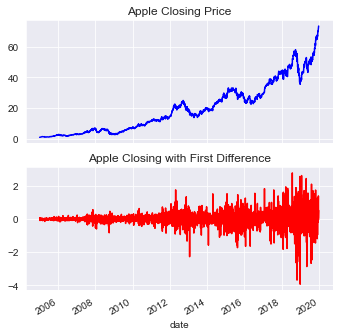

In [13]:
# Declare the fig abd ax as two arguments 
fig, ax = plt.subplots(2, sharex = True)
fig.set_size_inches(5.5, 5.5)
apple_df['close'].plot(ax = ax[0], color = 'b')
ax[0].set_title('Apple Closing Price')
first_order_diff.plot(ax = ax[1], color = 'r')
ax[1].set_title('Apple Closing with First Difference')

### Function For Autocorrelation and Partial Autocorrelation plots


In [14]:
# plotds is method to plot time series, ACF and PACF
def plotds(xt, nlag = 3, fig_size = (12, 10)):
    if not isinstance(xt, pd.Series):
         xt = pd.Series(xt)
    plt.figure(figsize=fig_size)
    layout = (2, 2)
    
    ax_xt = plt.subplot2grid(layout, (0, 0), colspan = 2)
    ax_acf= plt.subplot2grid(layout, (1, 0))
    ax_pacf = plt.subplot2grid(layout, (1, 1))
    
    xt.plot(ax = ax_xt)
    ax_xt.set_title('Time Series')
    plot_acf(xt, lags = 3, ax = ax_acf)
    plot_pacf(xt, lags = 3, ax = ax_pacf)
    plt.tight_layout()
    return None

### ACF and PACF plot for First Difference method

ADF Statistic: -9.760098
p-value: 0.000000


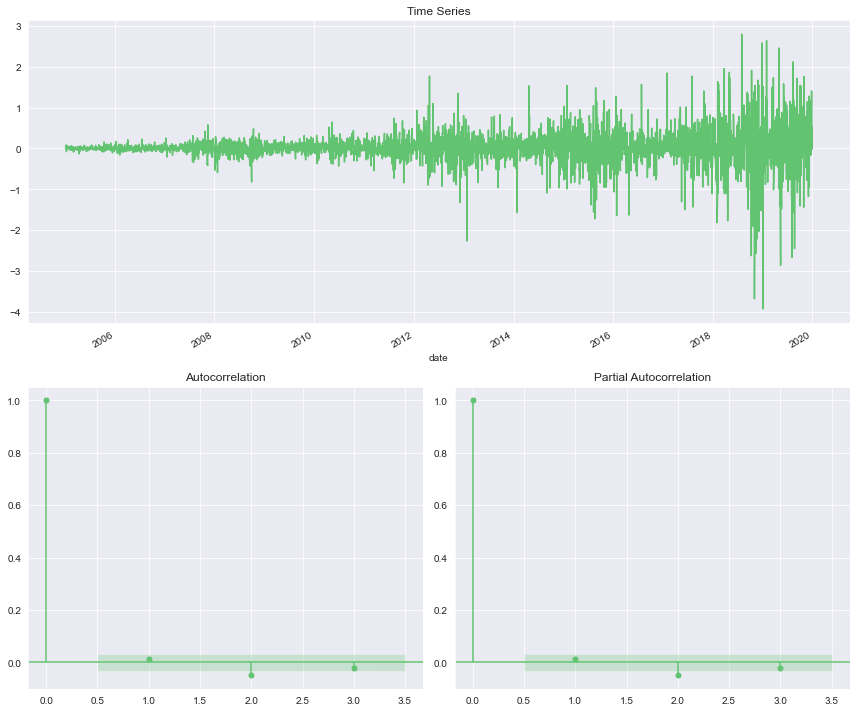

In [15]:
# plot the data with 12 lags
plotds(first_order_diff, nlag = 12)

# Perform Dicky Fuller test
adf_result = adfuller(first_order_diff)

# Display the outcomes
print('ADF Statistic: %f' % adf_result[0])
print('p-value: %f' % adf_result[1])

## Log10 Method

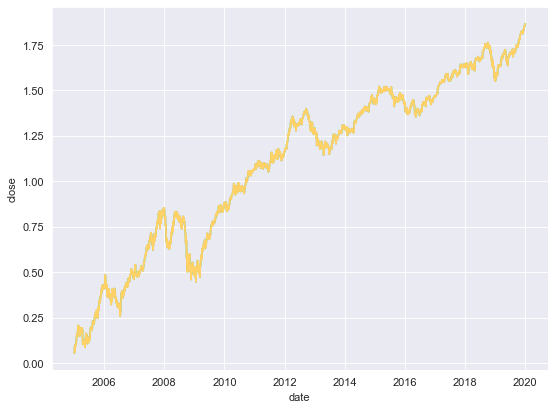

In [16]:
df_close_log7 = np.log10(apple_df.close)
figure(figsize=(8, 6), dpi=80)
sns.lineplot(x=df_close_log7.index,y=df_close_log7)
plt.plot(df_close_log7);

### ACF and PACF plot for Logarithm method

ADF Statistic: -1.362699
p-value: 0.600022


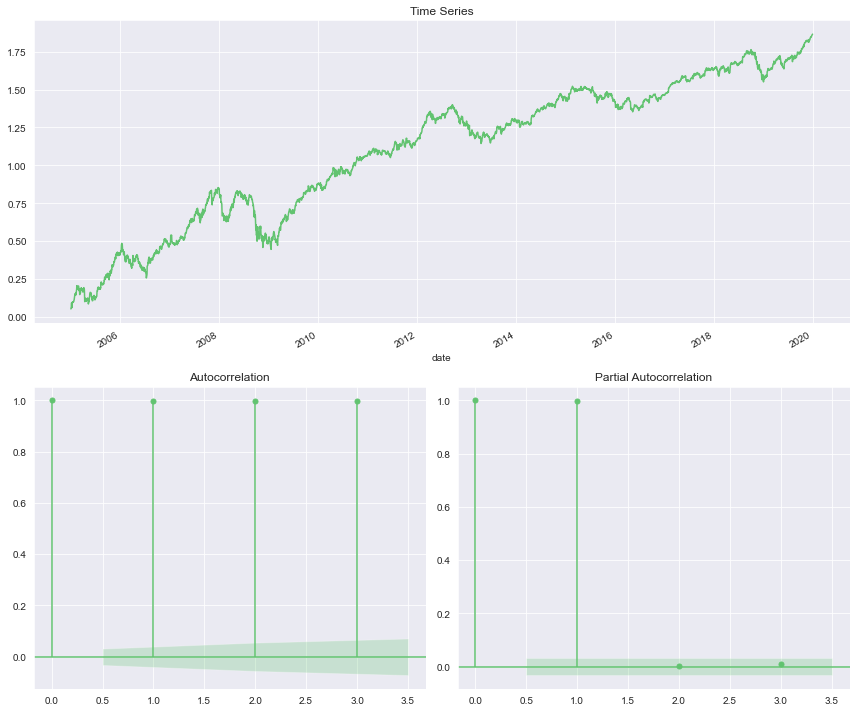

In [17]:
# plot the data with 50 lags
plotds(df_close_log7, nlag = 50)

# Perform Dicky Fuller test
adf_result = adfuller(df_close_log7)

# Display the outcomes
print('ADF Statistic: %f' % adf_result[0])
print('p-value: %f' % adf_result[1])

### Function for calculating rolling mean and standard deviation 

In [18]:
def get_stationarity(timeseries):
    
    # rolling statistics
    rolling_mean = timeseries.rolling(window=12,min_periods = 1).mean()
    rolling_std = timeseries.rolling(window=12,min_periods = 1).std()
    
    # rolling statistics plot
    original = plt.plot(timeseries, color='blue', label='Original')
    mean = plt.plot(rolling_mean, color='red', label='Rolling Mean')
    std = plt.plot(rolling_std, color='black', label='Rolling Std')
    plt.legend(loc='best')
    plt.title('Rolling Mean & Standard Deviation')
    plt.show(block=False)
    
 
    # Dickey–Fuller test:
    result = adfuller(timeseries)
    print('ADF Statistic: {}'.format(result[0]))
    print('p-value: {}'.format(result[1]))
    print('Critical Values:')
    for key, value in result[4].items():
        print('\t{}: {}'.format(key, value))


## Subtract Rolling Mean Method

In [19]:
apple_df.close.isnull()

date
2005-01-03    False
2005-01-04    False
2005-01-05    False
2005-01-06    False
2005-01-07    False
              ...  
2019-12-24    False
2019-12-26    False
2019-12-27    False
2019-12-30    False
2019-12-31    False
Name: close, Length: 3775, dtype: bool

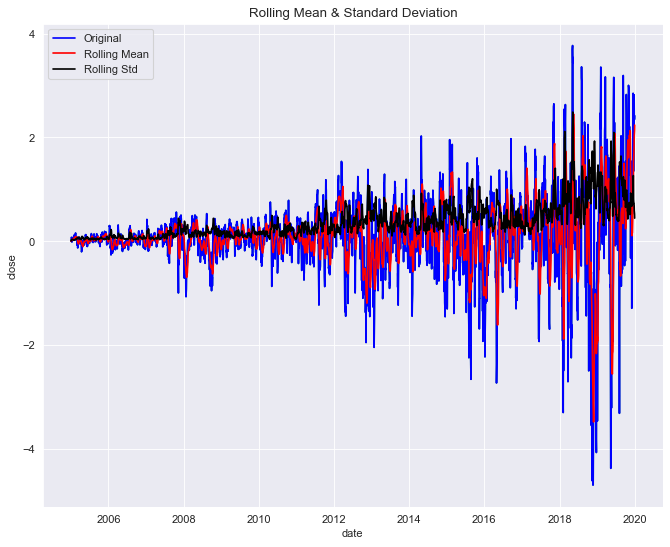

ADF Statistic: -8.977744496940534
p-value: 7.452351050728635e-15
Critical Values:
	1%: -3.432097339894967
	5%: -2.862312078352202
	10%: -2.567180988001804


In [20]:
rolling_mean = apple_df.close.rolling(window=12,min_periods = 1).mean()
figure(figsize=(10, 8), dpi=80)

df_minus_mean = apple_df.close - rolling_mean
df_minus_mean.dropna(inplace=True)
sns.lineplot(x=df_close_log7.index,y=df_minus_mean)
#sns.set_palette(['#62C370', '#FFD166', '#EF476F'])# Plot

get_stationarity(df_minus_mean);


### ACF and PACF plot for Rolling Mean method

ADF Statistic: -8.977744
p-value: 0.000000


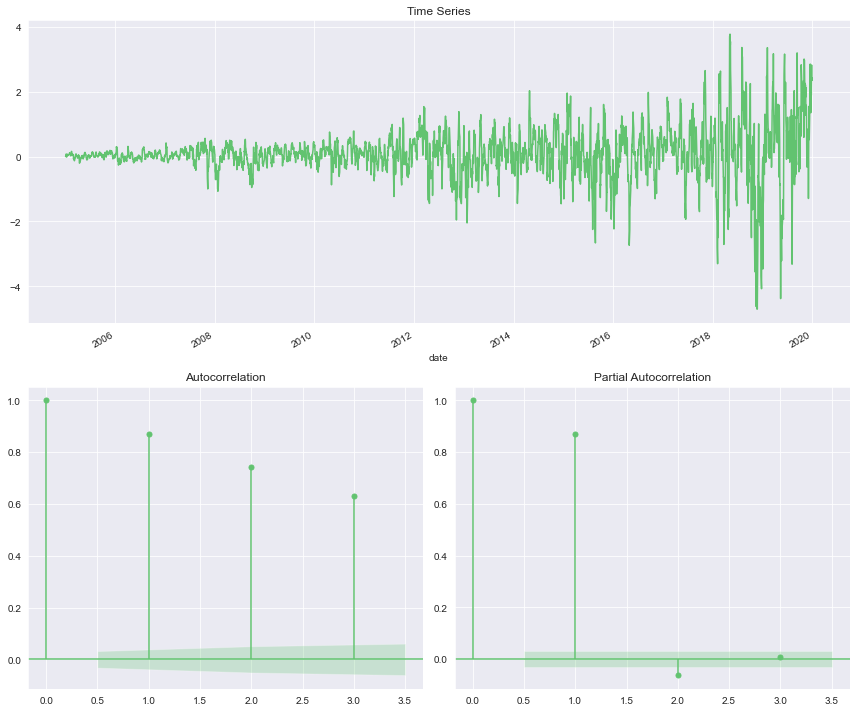

In [21]:
# plot the data with 50 lags
plotds(df_minus_mean, nlag = 50)

# Perform Dicky Fuller test
adf_result = adfuller(df_minus_mean)

# Display the outcomes
print('ADF Statistic: %f' % adf_result[0])
print('p-value: %f' % adf_result[1])

## Exponential Decay Method

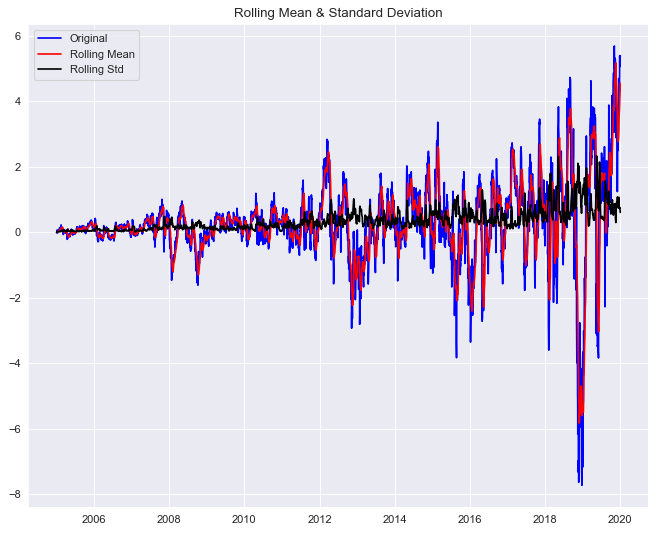

ADF Statistic: -6.764094887236674
p-value: 2.7450386517288636e-09
Critical Values:
	1%: -3.432097339894967
	5%: -2.862312078352202
	10%: -2.567180988001804


In [22]:
rolling_mean_exp_decay = apple_df.close.ewm(halflife=12, min_periods=0, adjust=True).mean()
figure(figsize=(10, 8), dpi=80)
df_exp_decay = apple_df.close - rolling_mean_exp_decay
df_exp_decay.dropna(inplace=True)
exp_stationary = get_stationarity(df_exp_decay)

### ACF and PACF plot for Exponential Decay Method

ADF Statistic: -6.764095
p-value: 0.000000


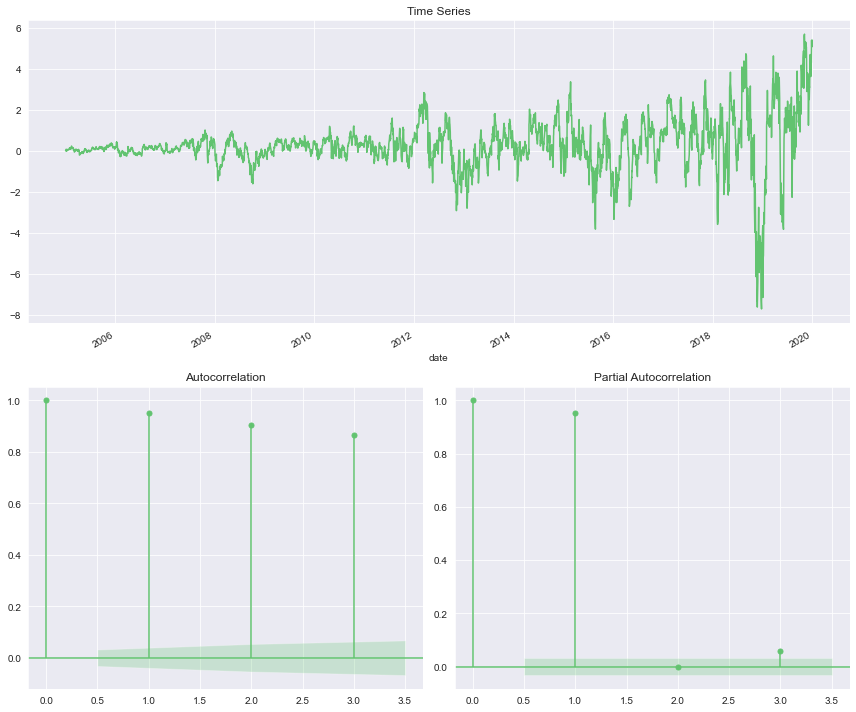

In [23]:
# plot the data with 50 lags
plotds(df_exp_decay, nlag = 50)

# Perform Dicky Fuller test
adf_result = adfuller(df_exp_decay)

# Display the outcomes
print('ADF Statistic: %f' % adf_result[0])
print('p-value: %f' % adf_result[1])

## Time Shift Method

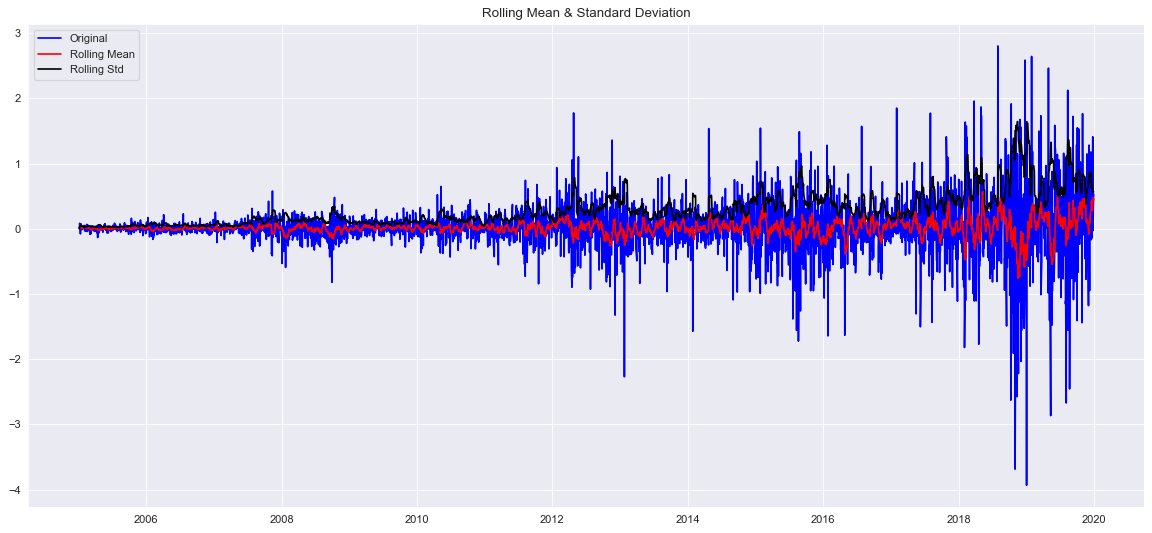

ADF Statistic: -9.760097763391293
p-value: 7.603588999387701e-17
Critical Values:
	1%: -3.432097339894967
	5%: -2.862312078352202
	10%: -2.567180988001804


In [24]:
figure(figsize=(18, 8), dpi=80)

df_shift = apple_df.close - apple_df.close.shift()
df_shift.dropna(inplace=True)
get_stationarity(df_shift)

### ACF and PACF plot for Time Shift method

ADF Statistic: -9.760098
p-value: 0.000000


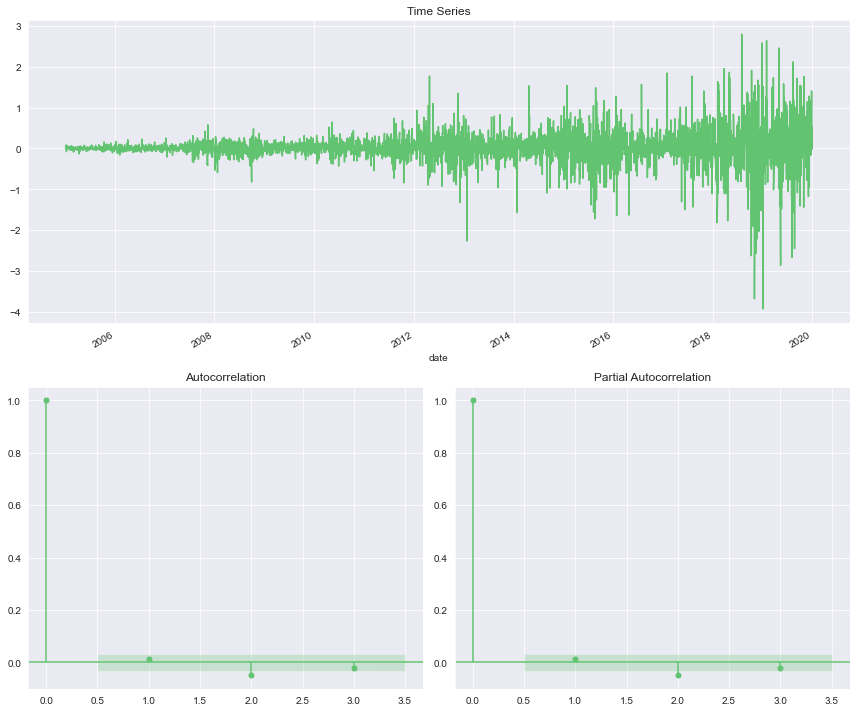

In [25]:
# plot the data with 50 lags
plotds(df_shift, nlag = 50)

# Perform Dicky Fuller test
adf_result = adfuller(df_shift)

# Display the outcomes
print('ADF Statistic: %f' % adf_result[0])
print('p-value: %f' % adf_result[1])

### Import Train Test Split

In [26]:
%store -r XA1_train
%store -r XA1_test

%store -r XA7_train
%store -r XA7_test

%store -r XA30_train
%store -r XA30_test

%store -r XA90_train
%store -r XA90_test


no stored variable or alias XA1_train
no stored variable or alias XA1_test
no stored variable or alias XA7_train
no stored variable or alias XA7_test
no stored variable or alias XA30_train
no stored variable or alias XA30_test
no stored variable or alias XA90_train
no stored variable or alias XA90_test


### Set Indicies

In [27]:
XA1_train = apple_df.loc[:'2019-12-02']
XA1_test = apple_df.loc['2019-12-03':]

XA7_train = apple_df.loc[:'2019-12-02']
XA7_test = apple_df.loc['2019-12-03':]

XA30_train = apple_df.loc[:'2019-12-02']
XA30_test = apple_df.loc['2019-12-03':]

XA90_train = apple_df.loc[:'2019-12-02']
XA90_test = apple_df.loc['2019-12-03':]


In [28]:
#XA30_train = XA30_train[XA30_train['date'] < '2021-04-11']



In [29]:
XA1_train.set_index(['date'], inplace = True)
XA7_train.set_index(['date'], inplace = True)
XA30_train.set_index(['date'], inplace = True)
XA90_train.set_index(['date'], inplace = True)


### Determine Differencing parameters to Stationarize using Auto Arima function on Training Data

In [30]:
model_autoARIMA = auto_arima(XA1_train.close, start_p=0, start_q=0,
                      test='adf',       # use adftest to find optimal 'd'
                      max_p=3, max_q=3, # maximum p and q
                      m=1,              # frequency of series
                      d=2,           # let model determine 'd'
                      seasonal=False,   # No Seasonality
                      start_P=0, 
                      D=2, 
                      trace=True,
                      error_action='ignore',  
                      suppress_warnings=True, 
                      stepwise=True)
print(model_autoARIMA.summary())

Performing stepwise search to minimize aic
 ARIMA(0,2,0)(0,0,0)[0] intercept   : AIC=6273.725, Time=0.36 sec
 ARIMA(1,2,0)(0,0,0)[0] intercept   : AIC=5340.880, Time=0.42 sec
 ARIMA(0,2,1)(0,0,0)[0] intercept   : AIC=inf, Time=3.68 sec
 ARIMA(0,2,0)(0,0,0)[0]             : AIC=6271.726, Time=0.24 sec
 ARIMA(2,2,0)(0,0,0)[0] intercept   : AIC=4875.627, Time=0.66 sec
 ARIMA(3,2,0)(0,0,0)[0] intercept   : AIC=4548.685, Time=0.86 sec
 ARIMA(3,2,1)(0,0,0)[0] intercept   : AIC=inf, Time=7.66 sec
 ARIMA(2,2,1)(0,0,0)[0] intercept   : AIC=inf, Time=4.59 sec
 ARIMA(3,2,0)(0,0,0)[0]             : AIC=4546.685, Time=0.47 sec
 ARIMA(2,2,0)(0,0,0)[0]             : AIC=4873.627, Time=0.33 sec
 ARIMA(3,2,1)(0,0,0)[0]             : AIC=inf, Time=2.21 sec
 ARIMA(2,2,1)(0,0,0)[0]             : AIC=inf, Time=1.58 sec

Best model:  ARIMA(3,2,0)(0,0,0)[0]          
Total fit time: 23.071 seconds
                               SARIMAX Results                                
Dep. Variable:                   

In [31]:
model_autoARIMA = auto_arima(XA7_train.close, start_p=0, start_q=0,
                      test='adf',       # use adftest to find optimal 'd'
                      max_p=3, max_q=3, # maximum p and q
                      m=1,              # frequency of series
                      d=2,           # let model determine 'd'
                      seasonal=False,   # No Seasonality
                      start_P=0, 
                      D=2, 
                      trace=True,
                      error_action='ignore',  
                      suppress_warnings=True, 
                      stepwise=True)
print(model_autoARIMA.summary())

Performing stepwise search to minimize aic
 ARIMA(0,2,0)(0,0,0)[0] intercept   : AIC=6273.725, Time=0.42 sec
 ARIMA(1,2,0)(0,0,0)[0] intercept   : AIC=5340.880, Time=0.46 sec
 ARIMA(0,2,1)(0,0,0)[0] intercept   : AIC=inf, Time=3.72 sec
 ARIMA(0,2,0)(0,0,0)[0]             : AIC=6271.726, Time=0.21 sec
 ARIMA(2,2,0)(0,0,0)[0] intercept   : AIC=4875.627, Time=0.83 sec
 ARIMA(3,2,0)(0,0,0)[0] intercept   : AIC=4548.685, Time=0.86 sec
 ARIMA(3,2,1)(0,0,0)[0] intercept   : AIC=inf, Time=7.74 sec
 ARIMA(2,2,1)(0,0,0)[0] intercept   : AIC=inf, Time=4.62 sec
 ARIMA(3,2,0)(0,0,0)[0]             : AIC=4546.685, Time=0.40 sec
 ARIMA(2,2,0)(0,0,0)[0]             : AIC=4873.627, Time=0.32 sec
 ARIMA(3,2,1)(0,0,0)[0]             : AIC=inf, Time=2.03 sec
 ARIMA(2,2,1)(0,0,0)[0]             : AIC=inf, Time=1.26 sec

Best model:  ARIMA(3,2,0)(0,0,0)[0]          
Total fit time: 22.879 seconds
                               SARIMAX Results                                
Dep. Variable:                   

In [32]:
model_autoARIMA = auto_arima(XA30_train.close, start_p=0, start_q=0,
                      test='adf',       # use adftest to find optimal 'd'
                      max_p=3, max_q=3, # maximum p and q
                      m=1,              # frequency of series
                      d=2,           # let model determine 'd'
                      seasonal=False,   # No Seasonality
                      start_P=0, 
                      D=2, 
                      trace=True,
                      error_action='ignore',  
                      suppress_warnings=True, 
                      stepwise=True)
print(model_autoARIMA.summary())

Performing stepwise search to minimize aic
 ARIMA(0,2,0)(0,0,0)[0] intercept   : AIC=6273.725, Time=0.36 sec
 ARIMA(1,2,0)(0,0,0)[0] intercept   : AIC=5340.880, Time=0.40 sec
 ARIMA(0,2,1)(0,0,0)[0] intercept   : AIC=inf, Time=3.52 sec
 ARIMA(0,2,0)(0,0,0)[0]             : AIC=6271.726, Time=0.15 sec
 ARIMA(2,2,0)(0,0,0)[0] intercept   : AIC=4875.627, Time=0.66 sec
 ARIMA(3,2,0)(0,0,0)[0] intercept   : AIC=4548.685, Time=0.99 sec
 ARIMA(3,2,1)(0,0,0)[0] intercept   : AIC=inf, Time=7.88 sec
 ARIMA(2,2,1)(0,0,0)[0] intercept   : AIC=inf, Time=5.02 sec
 ARIMA(3,2,0)(0,0,0)[0]             : AIC=4546.685, Time=0.45 sec
 ARIMA(2,2,0)(0,0,0)[0]             : AIC=4873.627, Time=0.40 sec
 ARIMA(3,2,1)(0,0,0)[0]             : AIC=inf, Time=2.24 sec
 ARIMA(2,2,1)(0,0,0)[0]             : AIC=inf, Time=1.36 sec

Best model:  ARIMA(3,2,0)(0,0,0)[0]          
Total fit time: 23.430 seconds
                               SARIMAX Results                                
Dep. Variable:                   

In [33]:
model_autoARIMA = auto_arima(XA90_train.close, start_p=0, start_q=0,
                      test='adf',       # use adftest to find optimal 'd'
                      max_p=3, max_q=3, # maximum p and q
                      m=1,              # frequency of series
                      d=2,           # let model determine 'd'
                      seasonal=False,   # No Seasonality
                      start_P=0, 
                      D=2, 
                      trace=True,
                      error_action='ignore',  
                      suppress_warnings=True, 
                      stepwise=True)
print(model_autoARIMA.summary())

Performing stepwise search to minimize aic
 ARIMA(0,2,0)(0,0,0)[0] intercept   : AIC=6273.725, Time=0.36 sec
 ARIMA(1,2,0)(0,0,0)[0] intercept   : AIC=5340.880, Time=0.40 sec
 ARIMA(0,2,1)(0,0,0)[0] intercept   : AIC=inf, Time=3.42 sec
 ARIMA(0,2,0)(0,0,0)[0]             : AIC=6271.726, Time=0.20 sec
 ARIMA(2,2,0)(0,0,0)[0] intercept   : AIC=4875.627, Time=0.71 sec
 ARIMA(3,2,0)(0,0,0)[0] intercept   : AIC=4548.685, Time=0.89 sec
 ARIMA(3,2,1)(0,0,0)[0] intercept   : AIC=inf, Time=8.40 sec
 ARIMA(2,2,1)(0,0,0)[0] intercept   : AIC=inf, Time=5.37 sec
 ARIMA(3,2,0)(0,0,0)[0]             : AIC=4546.685, Time=0.42 sec
 ARIMA(2,2,0)(0,0,0)[0]             : AIC=4873.627, Time=0.34 sec
 ARIMA(3,2,1)(0,0,0)[0]             : AIC=inf, Time=2.09 sec
 ARIMA(2,2,1)(0,0,0)[0]             : AIC=inf, Time=1.32 sec

Best model:  ARIMA(3,2,0)(0,0,0)[0]          
Total fit time: 23.919 seconds
                               SARIMAX Results                                
Dep. Variable:                   

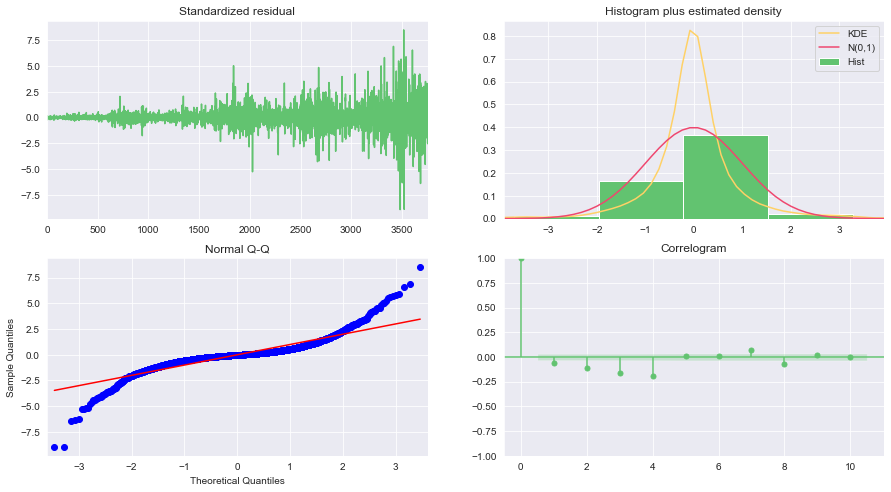

In [34]:
model_autoARIMA.plot_diagnostics(figsize=(15,8))
plt.show()

# Fit Models

### Fit 1 Day Model

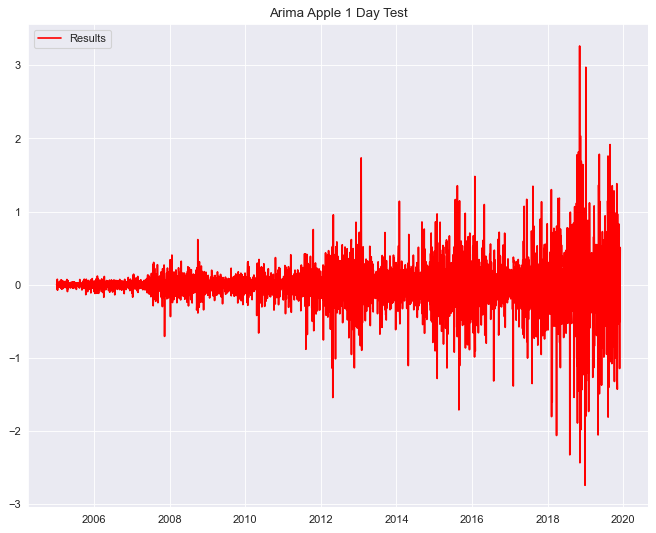

In [35]:
model1 = ARIMA(XA1_train.close, order=(3,2,0)); # Best p,d,q parameters from auto_arima
results1 = model1.fit();
figure(figsize=(10, 8), dpi=80);
plt.plot(results1.fittedvalues, color='red',label='Results');
plt.title('Arima Apple 1 Day Test')
plt.legend()

In [36]:
# Perform Dicky Fuller test
adf_result = adfuller(results1.fittedvalues)

print('ADF Statistic: {}'.format(result[0]))
print('p-value: {}'.format(result[1]))
print('Critical Values:')
for key, value in result[4].items():
    print('\t{}: {}'.format(key, value))

ADF Statistic: 1.8390579613826241
p-value: 0.9984234160843818
Critical Values:
	1%: -3.432097339894967
	5%: -2.862312078352202
	10%: -2.567180988001804


### Fit 7 Day Model

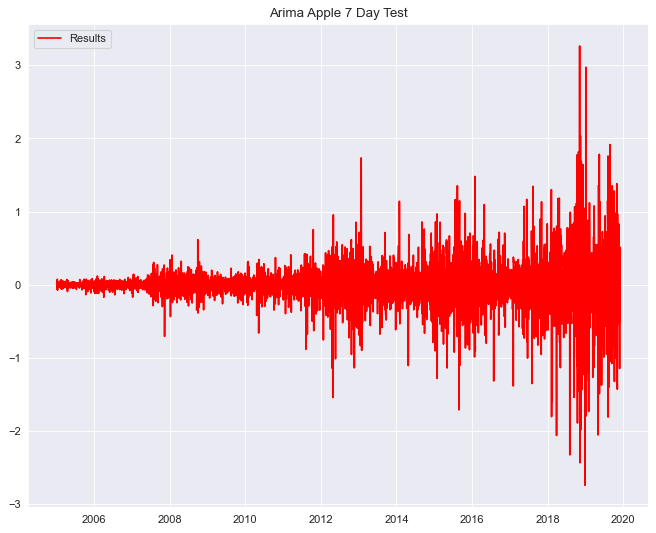

In [37]:
model7 = ARIMA(XA7_train.close, order=(3,2,0)); # Best p,d,q parameters from auto_arima
results7 = model7.fit();
figure(figsize=(10, 8), dpi=80);
plt.plot(results7.fittedvalues, color='red',label='Results');
plt.title('Arima Apple 7 Day Test')
plt.legend()

### Fit 30 Day Model

No handles with labels found to put in legend.


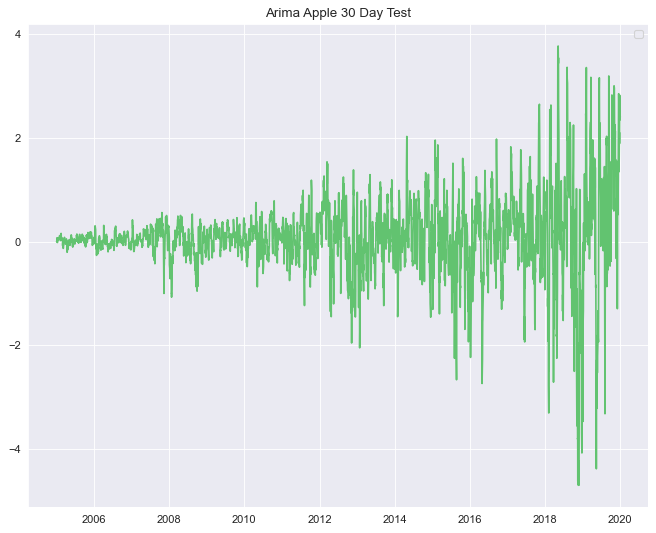

In [38]:
model30 = ARIMA(XA30_train.close, order=(3,2,0)); # Best p,d,q parameters from auto_arima
results30 = model30.fit();
figure(figsize=(10, 8), dpi=80);
plt.plot(apple_df.close - rolling_mean)
plt.title('Arima Apple 30 Day Test')
plt.legend()

ADF Statistic: -17.698761
p-value: 0.000000


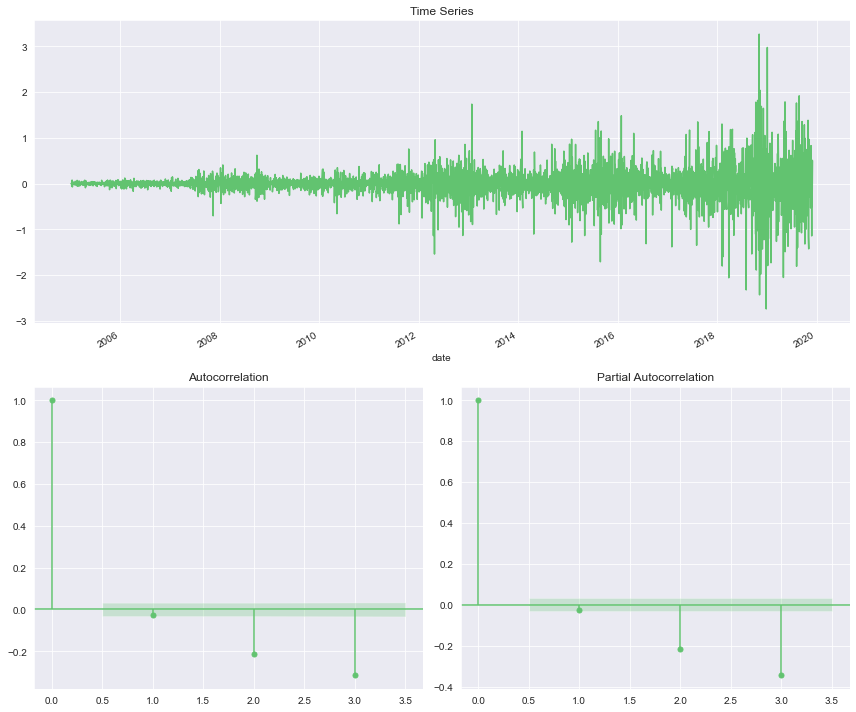

In [39]:
# plot the data with 50 lags
plotds(results30.fittedvalues, nlag = 3)

# Perform Dicky Fuller test
adf_result = adfuller(results30.fittedvalues)

# Display the outcomes
print('ADF Statistic: %f' % adf_result[0])
print('p-value: %f' % adf_result[1])

### Fit 90 Day Model

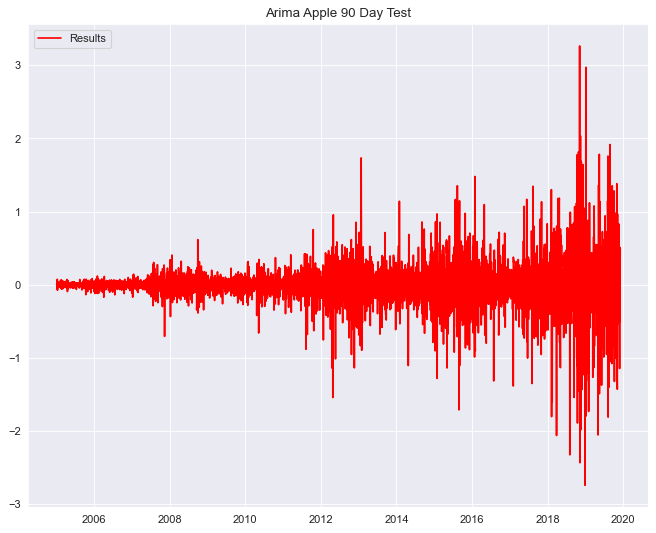

In [40]:
model90 = ARIMA(XA90_train.close, order=(3,2,0)); # Best p,d,q parameters from auto_arima
results90 = model90.fit();
figure(figsize=(10, 8), dpi=80);
plt.plot(results90.fittedvalues, color='red',label='Results');
plt.title('Arima Apple 90 Day Test')
plt.legend()

### Plot Predicted values and Original values based on 1 Day Test data

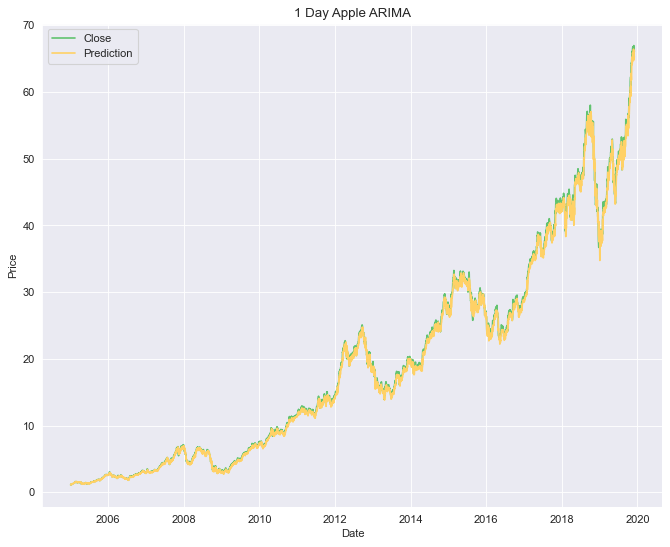

In [41]:
predictions_ARIMA_diff1 = pd.Series(results1.fittedvalues, copy=True)

predictions_ARIMA_diff_cumsum1 = predictions_ARIMA_diff1.cumsum()
predictions_ARIMA1 = pd.Series(XA1_train['close'], index=XA1_train.index)
predictions_ARIMA1 = predictions_ARIMA1.add(predictions_ARIMA_diff_cumsum1, fill_value=0)
figure(figsize=(10, 8), dpi=80);
plt.plot(XA1_train['close'], label='Close') 
plt.plot(predictions_ARIMA1,label='Prediction')
plt.xlabel('Date')
plt.ylabel('Price')
plt.title('1 Day Apple ARIMA')
plt.legend() 

### 7 Day Train Prediction

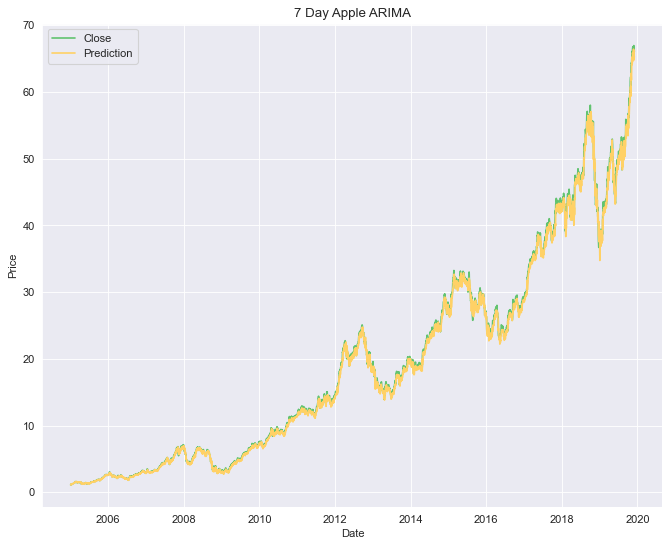

In [42]:
predictions_ARIMA_diff7 = pd.Series(results7.fittedvalues, copy=True)
predictions_ARIMA_diff_cumsum7 = predictions_ARIMA_diff7.cumsum()
predictions_ARIMA7 = pd.Series(XA7_train['close'], index=XA7_train.index)
predictions_ARIMA7 = predictions_ARIMA7.add(predictions_ARIMA_diff_cumsum7, fill_value=0)

figure(figsize=(10, 8), dpi=80);
plt.plot(XA7_train['close'], label='Close') 
plt.plot(predictions_ARIMA7,label='Prediction')
plt.title('7 Day Apple ARIMA')
plt.xlabel('Date')
plt.ylabel('Price')
plt.legend()

### 30 Day Train Prediction

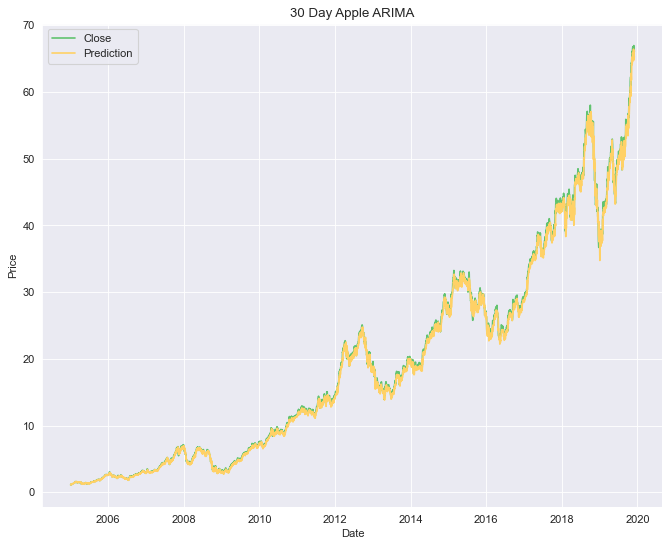

In [43]:
predictions_ARIMA_diff30 = pd.Series(results30.fittedvalues, copy=True)
predictions_ARIMA_diff_cumsum30 = predictions_ARIMA_diff30.cumsum()
predictions_ARIMA30 = pd.Series(XA30_train['close'], index=XA30_train.index)
predictions_ARIMA30 = predictions_ARIMA30.add(predictions_ARIMA_diff_cumsum30, fill_value=0)

figure(figsize=(10, 8), dpi=80);
plt.plot(XA30_train['close'], label='Close') 
plt.plot(predictions_ARIMA30,label='Prediction')
plt.title('30 Day Apple ARIMA')
plt.xlabel('Date')
plt.ylabel('Price')
plt.legend();

### 90 Day Train Prediction

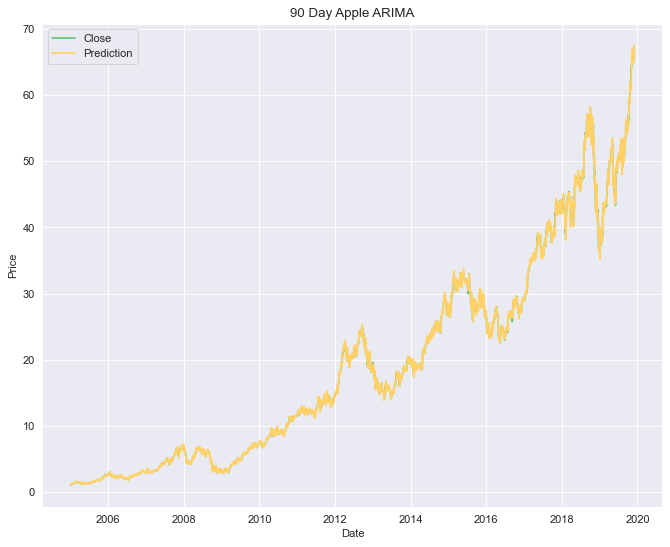

In [57]:
predictions_ARIMA_diff90 = pd.Series(results90.fittedvalues, copy=True)
#predictions_ARIMA_diff_cumsum90 = predictions_ARIMA_diff90.cumsum()
predictions_ARIMA90 = pd.Series(XA90_train['close'], index=XA90_train.index)
predictions_ARIMA90 = predictions_ARIMA90.add(predictions_ARIMA_diff90, fill_value=0)

figure(figsize=(10, 8), dpi=80);
plt.plot(XA90_train['close'], label='Close') 
plt.plot(predictions_ARIMA90,label='Prediction')
plt.title('90 Day Apple ARIMA')
plt.xlabel('Date')
plt.ylabel('Price')
plt.legend()    

### 1 Day Forecast

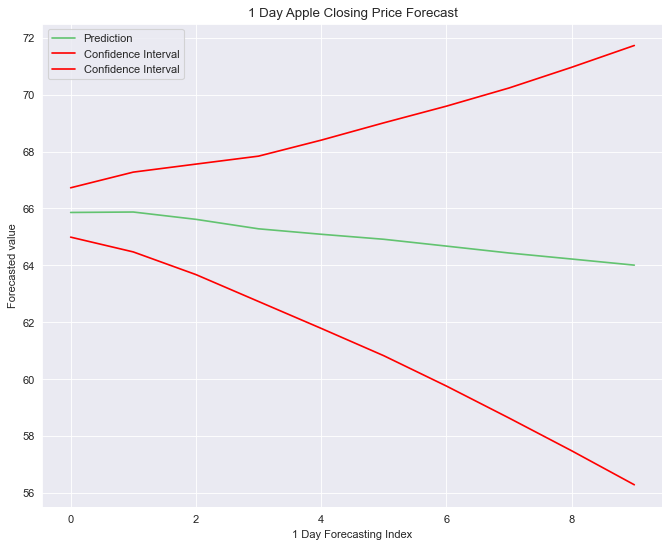

In [45]:
f, err, ci = results1.forecast(10)
figure(figsize=(10, 8), dpi=80);
plt.plot(f,label = 'Prediction');
plt.plot(ci,label='Confidence Interval',color='r');
plt.xlabel('1 Day Forecasting Index');
plt.ylabel('Forecasted value');
plt.title('1 Day Apple Closing Price Forecast');
plt.legend();

# The forecasting estimates and confidence interval obtained using the preceding script is shown in Figure


date
2019-12-03    64.862503
2019-12-04    65.434998
2019-12-05    66.394997
2019-12-06    67.677498
2019-12-09    66.730003
2019-12-10    67.120003
2019-12-11    67.692497
2019-12-12    67.864998
2019-12-13    68.787498
2019-12-16    69.964996
2019-12-17    70.102501
2019-12-18    69.934998
2019-12-19    70.004997
2019-12-20    69.860001
2019-12-23    71.000000
2019-12-24    71.067497
2019-12-26    72.477501
2019-12-27    72.449997
2019-12-30    72.879997
2019-12-31    73.412498
Name: close, dtype: float64


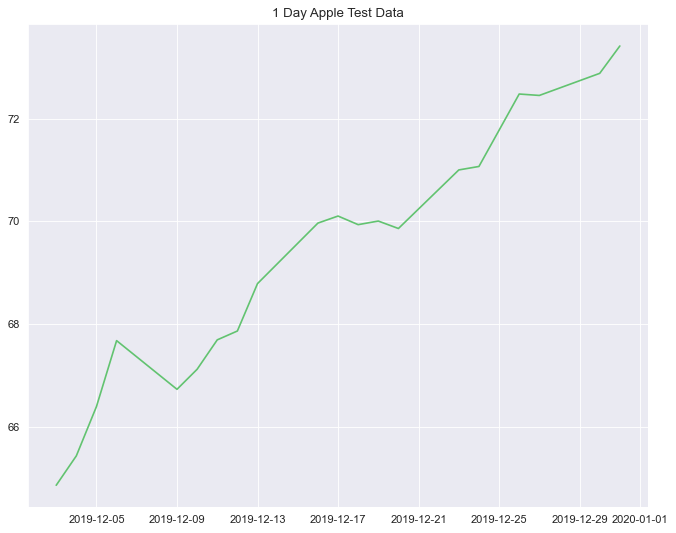

In [46]:
figure(figsize=(10, 8), dpi=80);
plt.plot(XA1_test.close)
plt
plt.title('1 Day Apple Test Data');
print(XA1_test.close)

### 7 Day Forecast

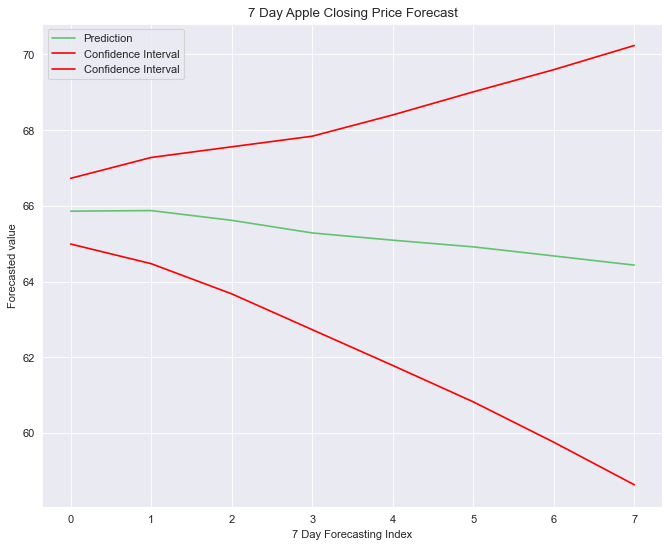

In [47]:
f, err, ci = results7.forecast(8)
figure(figsize=(10, 8), dpi=80);
plt.plot(f,label = 'Prediction');
plt.plot(ci,label='Confidence Interval',color='r');
plt.xlabel('7 Day Forecasting Index');
plt.ylabel('Forecasted value');
plt.title('7 Day Apple Closing Price Forecast');
plt.legend()

# The forecasting estimates and confidence interval obtained using the preceding script is shown in Figure


date
2019-12-03    64.862503
2019-12-04    65.434998
2019-12-05    66.394997
2019-12-06    67.677498
2019-12-09    66.730003
2019-12-10    67.120003
2019-12-11    67.692497
2019-12-12    67.864998
2019-12-13    68.787498
2019-12-16    69.964996
2019-12-17    70.102501
2019-12-18    69.934998
2019-12-19    70.004997
2019-12-20    69.860001
2019-12-23    71.000000
2019-12-24    71.067497
2019-12-26    72.477501
2019-12-27    72.449997
2019-12-30    72.879997
2019-12-31    73.412498
Name: close, dtype: float64


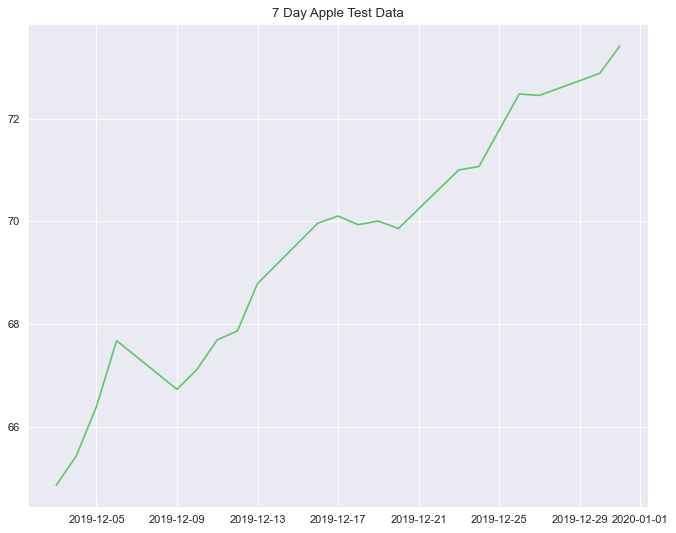

In [48]:
figure(figsize=(10, 8), dpi=80);
plt.plot(XA7_test.close)
plt
plt.title('7 Day Apple Test Data');
print(XA30_test.close)

### 30 Day Forecast

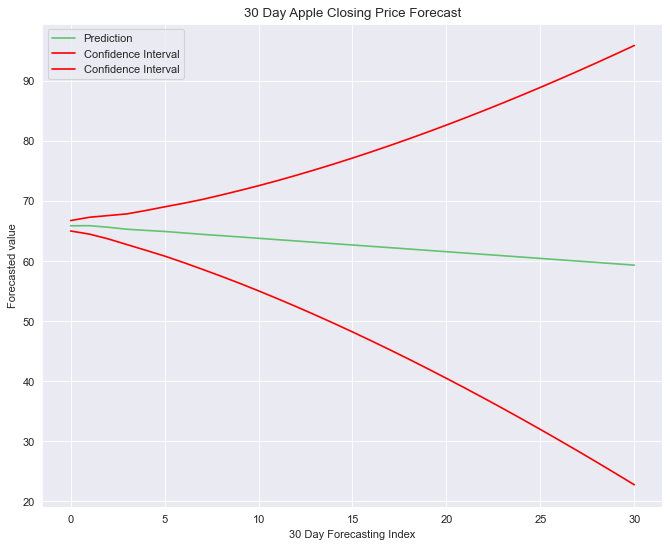

In [49]:
f, err, ci = results30.forecast(31)
figure(figsize=(10, 8), dpi=80);
plt.plot(f,label = 'Prediction');
plt.plot(ci,label='Confidence Interval',color='r');
plt.xlabel('30 Day Forecasting Index');
plt.ylabel('Forecasted value');
plt.title('30 Day Apple Closing Price Forecast');
plt.legend();

# The forecasting estimates and confidence interval obtained using the preceding script is shown in Figure


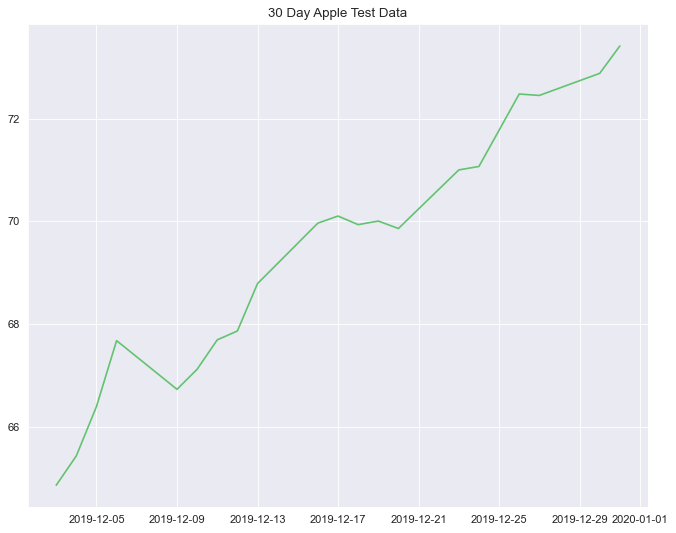

In [50]:
figure(figsize=(10, 8), dpi=80);
plt.plot(XA30_test.close)

plt.title('30 Day Apple Test Data');
#print(XA30_test.close)

### 90 Day Forecast

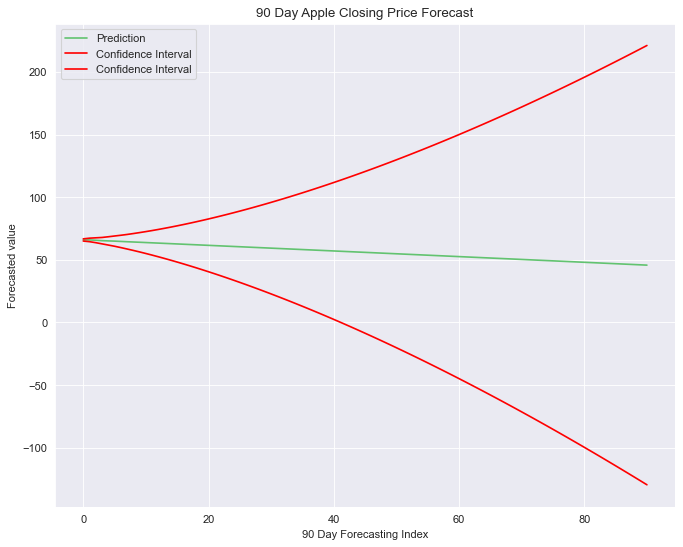

In [58]:
f, err, ci = results90.forecast(91)
figure(figsize=(10, 8), dpi=80);
plt.plot(f,label = 'Prediction');
plt.plot(ci,label='Confidence Interval',color='r');
plt.xlabel('90 Day Forecasting Index');
plt.ylabel('Forecasted value');
plt.title('90 Day Apple Closing Price Forecast');
plt.legend()

# The forecasting estimates and confidence interval obtained using the preceding script is shown in Figure


date
2019-12-03    64.862503
2019-12-04    65.434998
2019-12-05    66.394997
2019-12-06    67.677498
2019-12-09    66.730003
2019-12-10    67.120003
2019-12-11    67.692497
2019-12-12    67.864998
2019-12-13    68.787498
2019-12-16    69.964996
2019-12-17    70.102501
2019-12-18    69.934998
2019-12-19    70.004997
2019-12-20    69.860001
2019-12-23    71.000000
2019-12-24    71.067497
2019-12-26    72.477501
2019-12-27    72.449997
2019-12-30    72.879997
2019-12-31    73.412498
Name: close, dtype: float64


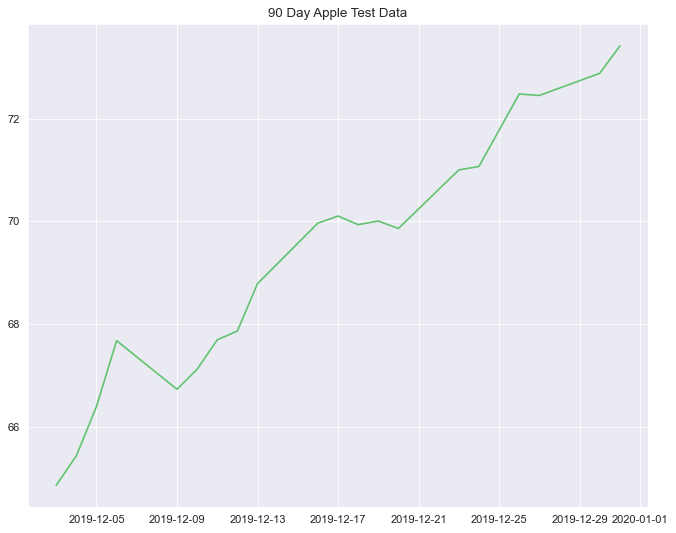

In [59]:
figure(figsize=(10, 8), dpi=80);
plt.plot(XA90_test.close)
plt
plt.title('90 Day Apple Test Data')
print(XA90_test.close)

## Evaluation

### Calculations to determine accuracy of the ARIMA model predictions

In [53]:
mse = mean_squared_error(XA1_train.close, predictions_ARIMA1)
print('MSE: '+str(mse))

mae = mean_absolute_error (XA1_train.close,predictions_ARIMA1)
print('MAE: '+str(mae))
rmse = math.sqrt(mean_squared_error(XA1_train.close,predictions_ARIMA1))
print('RMSE: '+str(rmse))
mape = np.mean(np.abs(predictions_ARIMA1 -  XA1_train.close)/np.abs(XA1_train.close))
print('MAPE: '+str(mape))


MSE: 0.2755079180986433
MAE: 0.3724074284753665
RMSE: 0.5248884815831295
MAPE: 0.022564236499379615


In [54]:
mse = mean_squared_error(XA7_train.close, predictions_ARIMA7)
print('MSE: '+str(mse))
mae = mean_absolute_error (XA7_train.close,predictions_ARIMA7)
print('MAE: '+str(mae))
rmse = math.sqrt(mean_squared_error(XA7_train.close,predictions_ARIMA7))
print('RMSE: '+str(rmse))
mape = np.mean(np.abs(predictions_ARIMA7 -  XA7_train.close)/np.abs(XA7_train.close))
print('MAPE: '+str(mape))


MSE: 0.2755079180986433
MAE: 0.3724074284753665
RMSE: 0.5248884815831295
MAPE: 0.022564236499379615


In [55]:
mse = mean_squared_error(XA30_train.close, predictions_ARIMA30)
print('MSE: '+str(mse))

mae = mean_absolute_error (XA30_train.close,predictions_ARIMA30)
print('MAE: '+str(mae))
rmse = math.sqrt(mean_squared_error(XA30_train.close,predictions_ARIMA30))
print('RMSE: '+str(rmse))
mape = np.mean(np.abs(predictions_ARIMA30 -  XA30_train.close)/np.abs(XA30_train.close))
print('MAPE: '+str(mape))


MSE: 0.2755079180986433
MAE: 0.3724074284753665
RMSE: 0.5248884815831295
MAPE: 0.022564236499379615


In [60]:
mse = mean_squared_error(XA90_train.close, predictions_ARIMA90)
print('MSE: '+str(mse))

mae = mean_absolute_error (XA90_train.close,predictions_ARIMA90)
print('MAE: '+str(mae))
rmse = math.sqrt(mean_squared_error(XA90_train.close,predictions_ARIMA90))
print('RMSE: '+str(rmse))
mape = np.mean(np.abs(predictions_ARIMA90 -  XA90_train.close)/np.abs(XA90_train.close))
print('MAPE: '+str(mape))


MSE: 0.11490450152268553
MAE: 0.1974776236465404
RMSE: 0.33897566508922955
MAPE: 0.012143077167590036
